# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies
import requests
import json
# from api_keys import weather_api_key
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from citipy import citipy
from pprint import pprint

weather_api_key = "2fa22668358e341c73c3ca87620b204b"

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [4]:
cities = []

lat = np.random.uniform(-90, 90, size = 1500)
lng = np.random.uniform(-180, 180, size = 1500)

for x in range (0, 1500):
    city = citipy.nearest_city(lat[x], lng[x])
    cities.append(city.city_name)

cities = list(set(cities))

len(cities)


611

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [33]:
cities_df = pd.DataFrame({"City": cities,
                 "Lat": "",
                  "Lng": "",
                  "Temperature": "",
                  "Humidity": "",
                  "Cloudiness": "",
                  "Wind Speed": ""})

for index, row in cities_df.iterrows():

    city = row["City"]
    params = {"q":city,
         "units":"metric",
         "appid":weather_api_key}

    try:
        response = requests.get(url, params = params).json()
        
        cities_df.loc[index, "Lat"] = response['coord']['lat']
        cities_df.loc[index, "Lng"] = response['coord']['lon']
        cities_df.loc[index, "Temperature"] = response['main']['temp']
        cities_df.loc[index, "Humidity"] = response['main']['humidity']
        cities_df.loc[index, "Cloudiness"] = response['clouds']['all']
        cities_df.loc[index, "Wind Speed"] = response['wind']['speed']
        cities_df.loc[index, "Country"] = response["sys"]["country"]

        print(f"Retrieving data for {index + 1} - {response['name']}")
        
    except (KeyError, IndexError):
        pass


Retrieving data for 1 - Codrington
Retrieving data for 3 - Sept-Îles
Retrieving data for 4 - Takoradze
Retrieving data for 5 - Zhicheng
Retrieving data for 6 - Kavaratti
Retrieving data for 7 - Grindavik
Retrieving data for 8 - Chapais
Retrieving data for 9 - Comodoro Rivadavia
Retrieving data for 10 - Esmeraldas
Retrieving data for 12 - Östersund
Retrieving data for 13 - Pervomayskoye
Retrieving data for 14 - Lismore
Retrieving data for 15 - Aklavik
Retrieving data for 16 - Borba
Retrieving data for 17 - Mehamn
Retrieving data for 18 - Thompson
Retrieving data for 19 - Hearst
Retrieving data for 20 - Ngunguru
Retrieving data for 21 - Shelburne
Retrieving data for 22 - Saint Andrews
Retrieving data for 23 - Flin Flon
Retrieving data for 24 - Kruisfontein
Retrieving data for 25 - Verkhnetulomskiy
Retrieving data for 26 - Guerrero Negro
Retrieving data for 27 - Esim
Retrieving data for 28 - Batemans Bay
Retrieving data for 29 - Dunda
Retrieving data for 30 - Deputatsky
Retrieving data fo

Retrieving data for 256 - Cowra
Retrieving data for 257 - Hofn
Retrieving data for 258 - Poya
Retrieving data for 259 - Nālūt
Retrieving data for 260 - Raudeberg
Retrieving data for 261 - Mabaruma
Retrieving data for 262 - Tuktoyaktuk
Retrieving data for 263 - Mae Sai
Retrieving data for 264 - Wittenberge
Retrieving data for 265 - Palu
Retrieving data for 266 - Gujar Khan
Retrieving data for 267 - Kieta
Retrieving data for 269 - Humaitá
Retrieving data for 271 - Havre-St-Pierre
Retrieving data for 272 - Berdigestyakh
Retrieving data for 273 - Kitaibaraki
Retrieving data for 274 - Klaksvík
Retrieving data for 275 - Mersing
Retrieving data for 276 - Biak
Retrieving data for 277 - Arrondissement de Bastia
Retrieving data for 278 - Atar
Retrieving data for 280 - Bonavista
Retrieving data for 281 - Albany
Retrieving data for 282 - Nurota
Retrieving data for 283 - Casper
Retrieving data for 284 - Ponta Delgada
Retrieving data for 285 - Dukat
Retrieving data for 286 - Mocuba
Retrieving data f

Retrieving data for 505 - Haverfordwest
Retrieving data for 506 - Waipawa
Retrieving data for 507 - Opuwo
Retrieving data for 508 - Cariré
Retrieving data for 509 - Río Gallegos
Retrieving data for 510 - Inírida
Retrieving data for 511 - Naze
Retrieving data for 512 - Waynesville
Retrieving data for 513 - Padilla
Retrieving data for 514 - Roanoke Rapids
Retrieving data for 515 - Puerto Escondido
Retrieving data for 516 - Saint-Philippe
Retrieving data for 517 - Kumluca
Retrieving data for 518 - Tadine
Retrieving data for 519 - Ixtapa
Retrieving data for 520 - Kiryat Gat
Retrieving data for 521 - Cidreira
Retrieving data for 522 - Chepareria
Retrieving data for 523 - Siraha
Retrieving data for 524 - Cortez
Retrieving data for 525 - Ţaga
Retrieving data for 526 - Ostrovnoy
Retrieving data for 527 - Aykhal
Retrieving data for 528 - Pedernales
Retrieving data for 529 - Gannan
Retrieving data for 530 - Bonthe
Retrieving data for 531 - Andilamena
Retrieving data for 532 - Oktyabr'skoye
Retri

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [55]:
cities_df.to_csv("Cities_weather.csv")

In [56]:
cities_df.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,codrington,-38.2667,141.9667,10.79,68,100,4.54,AU
1,utiroa,,,,,,,NaN
2,sept-iles,50.2001,-66.3821,8.92,77,100,5.36,CA
3,takoradi,4.8845,-1.7554,24.77,86,100,1.6,GH
4,zhicheng,30.2956,111.5047,30.8,48,1,2.04,CN


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [35]:
# Remove rows not found on OpenWeatherMap
clean_cities_df = cities_df[cities_df['Humidity'] != ""].reset_index()

#Check for cities with humidity >100
clean_cities_df.loc[clean_cities_df['Humidity'] < 101]

,index,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,0,codrington,-38.2667,141.9667,10.79,68,100,4.54,AU
1,2,sept-iles,50.2001,-66.3821,8.92,77,100,5.36,CA
2,3,takoradi,4.8845,-1.7554,24.77,86,100,1.6,GH
3,4,zhicheng,30.2956,111.5047,30.8,48,1,2.04,CN
4,5,kavaratti,10.5669,72.642,27.52,80,100,8.02,IN
...,...,...,...,...,...,...,...,...,...
565,606,bengkulu,-3.8004,102.2655,28.98,67,79,3.41,ID
566,607,bambanglipuro,-7.95,110.2833,27.41,75,85,5.32,ID
567,608,brae,60.3964,-1.353,13.95,91,99,4.95,GB
568,609,paris,48.8534,2.3488,19.03,97,90,1.54,FR


In [36]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = clean_cities_df.drop(["index"], axis = 1, inplace = False)
clean_city_data.head()

,City,Lat,Lng,Temperature,Humidity,Cloudiness,Wind Speed,Country
0,codrington,-38.2667,141.9667,10.79,68,100,4.54,AU
1,sept-iles,50.2001,-66.3821,8.92,77,100,5.36,CA
2,takoradi,4.8845,-1.7554,24.77,86,100,1.6,GH
3,zhicheng,30.2956,111.5047,30.8,48,1,2.04,CN
4,kavaratti,10.5669,72.642,27.52,80,100,8.02,IN


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This graph displays the maximum temperature in celcius for 570 randomly generated cities across the world at different latitudes. This graph indicates that the closer a city is to a the equator, the warmer it is likely to be.


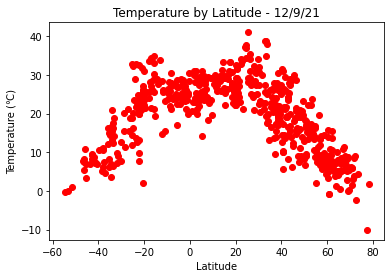

In [37]:
lat = clean_city_data["Lat"]
temp = clean_city_data["Temperature"]

plt.title("Temperature by Latitude - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Temperature (℃)")

plt.scatter(lat, temp, marker="o", color="red")

plt.savefig("lat_by_temp.png")

print("This graph displays the maximum temperature in celcius for 570 randomly generated cities across the world at different latitudes. This graph indicates that the closer a city is to a the equator, the warmer it is likely to be.")
plt.show()

## Latitude vs. Humidity Plot

This graph displays the relative humidity for 570 randomly generated cities across the world at different latitudes. This graph shows no relationships between humidity and latitude.


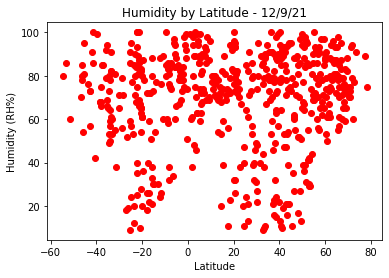

In [38]:
lat = clean_city_data["Lat"]
humidity = clean_city_data["Humidity"]

plt.title("Humidity by Latitude - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Humidity (RH%)")

plt.scatter(lat, humidity, marker="o", color="red")

plt.savefig("lat_by_humidity.png")

print("This graph displays the relative humidity for 570 randomly generated cities across the world at different latitudes. This graph shows no relationships between humidity and latitude.")
plt.show()

## Latitude vs. Cloudiness Plot

This graph displays percentage of cloud cover in 570 randomly generated cities across the world at different latitudes. This graph shows no relationship between cloudiness and latitude.


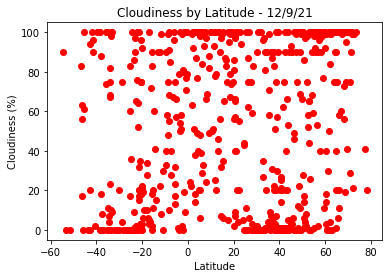

In [39]:
lat = clean_city_data["Lat"]
cloud = clean_city_data["Cloudiness"]

plt.title("Cloudiness by Latitude - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

plt.scatter(lat, cloud, marker="o", color="red")

plt.savefig("lat_by_cloud.png")

print("This graph displays percentage of cloud cover in 570 randomly generated cities across the world at different latitudes. This graph shows no relationship between cloudiness and latitude.")
plt.show()

## Latitude vs. Wind Speed Plot

This graph displays wind speeds in kilometres per hour for 570 randomly generated cities across the world at different latitudes. This graph shows no cleasr relationship between wind speed and latitude.


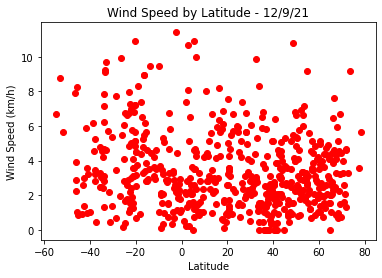

In [40]:
lat = clean_city_data["Lat"]
wind = clean_city_data["Wind Speed"]

plt.title("Wind Speed by Latitude - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")

plt.scatter(lat, wind, marker="o", color="red")

plt.savefig("lat_by_wind.png")

print("This graph displays wind speeds in kilometres per hour for 570 randomly generated cities across the world at different latitudes. This graph shows no cleasr relationship between wind speed and latitude.")
plt.show()

## Linear Regression

In [41]:
north_hemisphere = clean_city_data[clean_city_data["Lat"] >= 0]
south_hemisphere = clean_city_data[clean_city_data["Lat"] < 0]
from scipy.stats import linregress

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

This graph displays a strong negative correlation between latitude and maximum temperature in cities in the northern hemisphere indicating that the closer a city is to the equator, the warmer it is likely to be, r = -0.8, p = 0.0. This relationship explains 64% of the variance in the data.


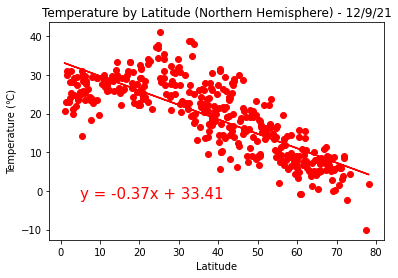

In [42]:
lat_north = list(north_hemisphere["Lat"])
temp_north = list(north_hemisphere["Temperature"])


plt.title("Temperature by Latitude (Northern Hemisphere) - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Temperature (℃)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, temp_north)
regress_values = pd.Series(lat_north) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_north, temp_north, marker="o", color="red")
plt.plot(lat_north, regress_values, "r-")
plt.annotate(line_eq,(5,-2),fontsize = 15,color = "red")

plt.savefig("lat_by_temp_north.png")

print(f"This graph displays a strong negative correlation between latitude and maximum temperature in cities in the northern hemisphere indicating that the closer a city is to the equator, the warmer it is likely to be, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}. This relationship explains 64% of the variance in the data.")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

This graph displays a positive correlation between latitude and maximum temperature in cities in the southern hemisphere also indicating that the closer a city is to the equator, the warmer it is likely to be, r = 0.77, p = 0.0. This relationship explains 59% of the variance in the data.


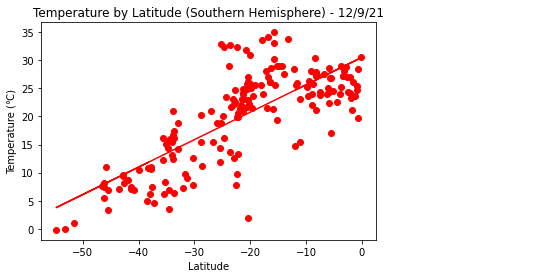

In [45]:
lat_south = list(south_hemisphere["Lat"])
temp_south = list(south_hemisphere["Temperature"])


plt.title("Temperature by Latitude (Southern Hemisphere) - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Temperature (℃)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, temp_south)
regress_values = pd.Series(lat_south) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_south, temp_south, marker="o", color="red")
plt.plot(lat_south, regress_values, "r-")
plt.annotate(line_eq,(5,-2),fontsize = 15,color = "red")

plt.savefig("lat_by_temp_south.png")

print(f"This graph displays a positive correlation between latitude and maximum temperature in cities in the southern hemisphere also indicating that the closer a city is to the equator, the warmer it is likely to be, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}. This relationship explains 59% of the variance in the data.")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

This graph displays no significant relationship between latitude and humidity in cities in the northern hemisphere, r = 0.03, p = 0.526.


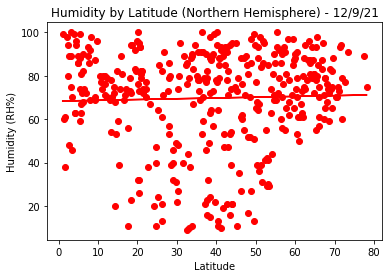

In [46]:
lat_north = list(north_hemisphere["Lat"])
humidity_north = list(north_hemisphere["Humidity"])


plt.title("Humidity by Latitude (Northern Hemisphere) - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Humidity (RH%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, humidity_north)
regress_values = pd.Series(lat_north) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_north, humidity_north, marker="o", color="red")
plt.plot(lat_north, regress_values, "r-")
plt.annotate(line_eq,(5,-2),fontsize = 15,color = "red")

plt.savefig("lat_by_humidity_north.png")

print(f"This graph displays no significant relationship between latitude and humidity in cities in the northern hemisphere, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}.")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

This graph displays no significant relationship between latitude and humidity in cities in the southern hemisphere, r = 0.02, p = 0.797.


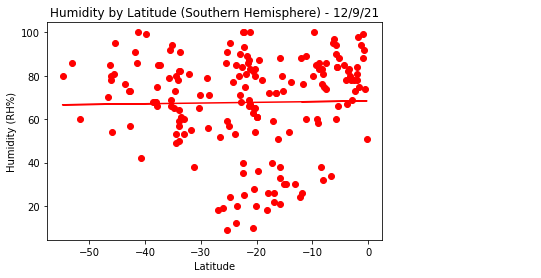

In [47]:
lat_south = list(south_hemisphere["Lat"])
humidity_south = list(south_hemisphere["Humidity"])


plt.title("Humidity by Latitude (Southern Hemisphere) - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Humidity (RH%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, humidity_south)
regress_values = pd.Series(lat_south) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_south, humidity_south, marker="o", color="red")
plt.plot(lat_south, regress_values, "r-")
plt.annotate(line_eq,(5,-2),fontsize = 15,color = "red")

plt.savefig("lat_by_humidity_south.png")

print(f"This graph displays no significant relationship between latitude and humidity in cities in the southern hemisphere, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}.")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

This graph displays no significant relationship between latitude and cloudiness in cities in the northern hemisphere, r = 0.04, p = 0.38.


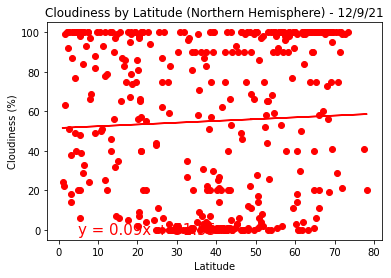

In [48]:
lat_north = list(north_hemisphere["Lat"])
cloud_north = list(north_hemisphere["Cloudiness"])


plt.title("Cloudiness by Latitude (Northern Hemisphere) - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, cloud_north)
regress_values = pd.Series(lat_north) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_north, cloud_north, marker="o", color="red")
plt.plot(lat_north, regress_values, "r-")
plt.annotate(line_eq,(5,-2),fontsize = 15,color = "red")

plt.savefig("lat_by_cloudiness_north.png")

print(f"This graph displays no significant relationship between latitude and cloudiness in cities in the northern hemisphere, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

This graph displays no significant relationship between latitude and cloudiness in cities in the northern hemisphere, r = 0.11, p = 0.133.


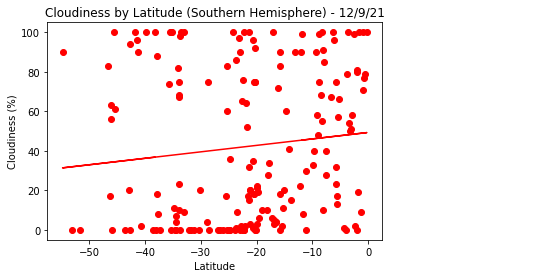

In [49]:
lat_south = list(south_hemisphere["Lat"])
cloud_south = list(south_hemisphere["Cloudiness"])


plt.title("Cloudiness by Latitude (Southern Hemisphere) - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, cloud_south)
regress_values = pd.Series(lat_south) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_south, cloud_south, marker="o", color="red")
plt.plot(lat_south, regress_values, "r-")
plt.annotate(line_eq,(5,-2),fontsize = 15,color = "red")

plt.savefig("lat_by_cloudiness_south.png")

print(f"This graph displays no significant relationship between latitude and cloudiness in cities in the northern hemisphere, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}.")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

No correlation between wind speed and latitude was found in the northern hemisphere, r = -0.02, p = 0.659.


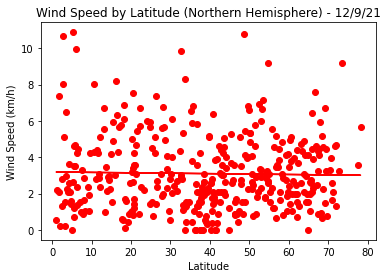

In [50]:
lat_north = list(north_hemisphere["Lat"])
wind_north = list(north_hemisphere["Wind Speed"])


plt.title("Wind Speed by Latitude (Northern Hemisphere) - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, wind_north)
regress_values = pd.Series(lat_north) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_north, wind_north, marker="o", color="red")
plt.plot(lat_north, regress_values, "r-")
plt.annotate(line_eq,(5,-2),fontsize = 15,color = "red")

plt.savefig("lat_by_wind_north.png")

print(f"No correlation between wind speed and latitude was found in the northern hemisphere, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

This graph displays a weak negative correlation between latitude and wind speed in cities in the southern hemisphere indicating that being closer to the equator may increase wind speeds, r = -0.15, p = 0.04. However, this relationship only explains 2% of the variance in the data.


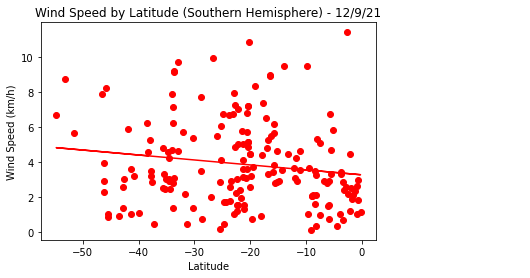

In [53]:
lat_south = list(south_hemisphere["Lat"])
wind_south = list(south_hemisphere["Wind Speed"])


plt.title("Wind Speed by Latitude (Southern Hemisphere) - 12/9/21")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (km/h)")


(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, wind_south)
regress_values = pd.Series(lat_south) * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(lat_south, wind_south, marker="o", color="red")
plt.plot(lat_south, regress_values, "r-")
plt.annotate(line_eq,(5,-2),fontsize = 15,color = "red")

plt.savefig("lat_by_wind_south.png")

print(f"This graph displays a weak negative correlation between latitude and wind speed in cities in the southern hemisphere indicating that being closer to the equator may increase wind speeds, r = {round(rvalue, 2)}, p = {round(pvalue, 3)}. However, this relationship only explains 2% of the variance in the data.")
plt.show()

In [54]:
print(f"Conclusions: \n \n1. Cities closer to the equator tend to reach higher max temperatures in both the southern and northern hemisphere.  \n2. The latitude of a city has no effect on the cloudiness or humidity.  \n3. Wind speed is possibly be related with closeness to the equator however, due to only the southern hemisphere providing a weak correlation, further investigation is required to better understand the factors effecting wind speeds.")

Conclusions: 
 
1. Cities closer to the equator tend to reach higher max temperatures in both the southern and northern hemisphere.  
2. The latitude of a city has no effect on the cloudiness or humidity.  
3. Wind speed is possibly be related with closeness to the equator however, due to only the southern hemisphere providing a weak correlation, further investigation is required to better understand the factors effecting wind speeds.
